# Getting started

## Data representation

In [1]:
from tsfuse.data import Collection

X = {
    'x1': Collection([
        [[1], [2], [3]],
        [[1], [2], [3]],
        [[1], [2], [3]],
        [[3], [2], [1]],
        [[3], [2], [1]],
        [[3], [2], [1]],
    ]),
    'x2': Collection([
        [[1], [2], [3]],
        [[1], [2], [3]],
        [[1], [2], [3]],
        [[1], [2], [3]],
        [[1], [2], [3]],
        [[1], [2], [3]],
    ]),
}

In [2]:
y = [0, 0, 0, 1, 1, 1]

## Feature construction

In [3]:
from tsfuse import construct
features, graph = construct(X, y, transformers='minimal', return_graph=True)

In [4]:
features

,"Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=2)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=3)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=4)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=5)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=6)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=7)","Sqrt(Variance(Ratio(Input(x1), Input(x2))))"
0,1.000000,1.0,1.000000,0.000000,NaN,NaN,0.000000
1,1.000000,1.0,1.000000,0.000000,NaN,NaN,0.000000
2,1.000000,1.0,1.000000,0.000000,NaN,NaN,0.000000
3,0.333333,3.0,1.444444,1.283951,0.528005,-1.5,1.133115
4,0.333333,3.0,1.444444,1.283951,0.528005,-1.5,1.133115
5,0.333333,3.0,1.444444,1.283951,0.528005,-1.5,1.133115


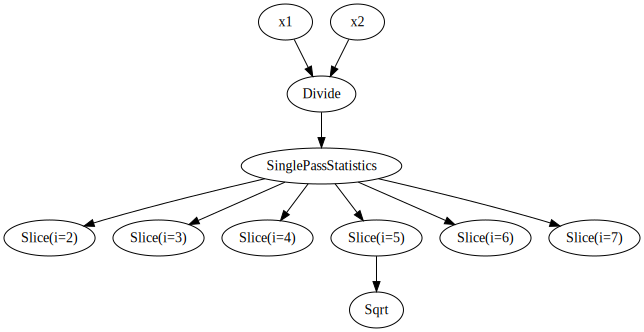

In [5]:
graph

In [6]:
graph.transform(X)

,"Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=2)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=3)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=4)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=5)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=6)","Slice(SinglePassStatistics(Ratio(Input(x1), Input(x2))), i=7)","Sqrt(Variance(Ratio(Input(x1), Input(x2))))"
0,1.000000,1.0,1.000000,0.000000,NaN,NaN,0.000000
1,1.000000,1.0,1.000000,0.000000,NaN,NaN,0.000000
2,1.000000,1.0,1.000000,0.000000,NaN,NaN,0.000000
3,0.333333,3.0,1.444444,1.283951,0.528005,-1.5,1.133115
4,0.333333,3.0,1.444444,1.283951,0.528005,-1.5,1.133115
5,0.333333,3.0,1.444444,1.283951,0.528005,-1.5,1.133115


## Feature computation

In [7]:
from tsfuse.computation import Graph
graph = Graph()

In [8]:
from tsfuse.computation import Input
input1 = graph.add_node(Input('x1'))
input2 = graph.add_node(Input('x2'))

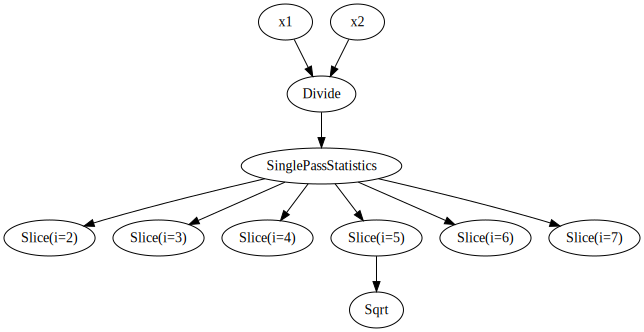

In [9]:
from tsfuse.transformers import Slice, SinglePassStatistics, Divide, Sqrt

graph.add_node(Slice(SinglePassStatistics(Divide(input1, input2)), i=2))
graph.add_node(Slice(SinglePassStatistics(Divide(input1, input2)), i=3))
graph.add_node(Slice(SinglePassStatistics(Divide(input1, input2)), i=4))
graph.add_node(Sqrt(Slice(SinglePassStatistics(Divide(input1, input2)), i=5)))
graph.add_node(Slice(SinglePassStatistics(Divide(input1, input2)), i=6))
graph.add_node(Slice(SinglePassStatistics(Divide(input1, input2)), i=7))

graph

In [10]:
graph.transform(X)

,"Slice(SinglePassStatistics(Divide(Input(x1), Input(x2))), i=2)","Slice(SinglePassStatistics(Divide(Input(x1), Input(x2))), i=3)","Slice(SinglePassStatistics(Divide(Input(x1), Input(x2))), i=4)","Slice(SinglePassStatistics(Divide(Input(x1), Input(x2))), i=6)","Slice(SinglePassStatistics(Divide(Input(x1), Input(x2))), i=7)","Sqrt(Slice(SinglePassStatistics(Divide(Input(x1), Input(x2))), i=5))"
0,1.000000,1.0,1.000000,NaN,NaN,0.000000
1,1.000000,1.0,1.000000,NaN,NaN,0.000000
2,1.000000,1.0,1.000000,NaN,NaN,0.000000
3,0.333333,3.0,1.444444,0.528005,-1.5,1.133115
4,0.333333,3.0,1.444444,0.528005,-1.5,1.133115
5,0.333333,3.0,1.444444,0.528005,-1.5,1.133115
